In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
# Загрузка данных
iris = load_iris()
data = iris.data # признаки
target = iris.target # метки классов для проверки

In [ ]:
# Масштабирование данных 
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

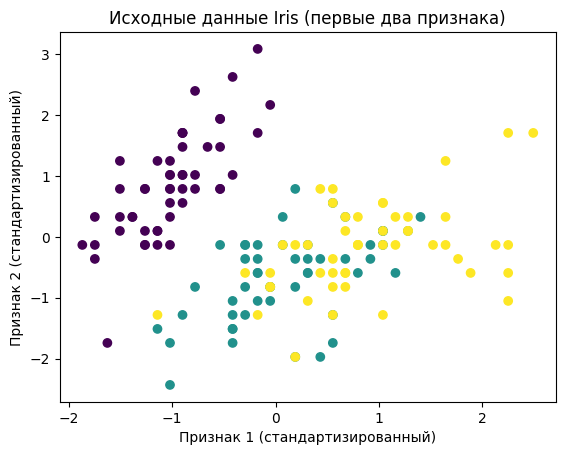

In [ ]:
# Визуализация первых двух признаков
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=target, cmap='viridis')
plt.title("Исходные данные Iris (первые два признака)")
plt.xlabel('Признак 1 (стандартизированный)')
plt.ylabel('Признак 2 (стандартизированный)')
plt.show()

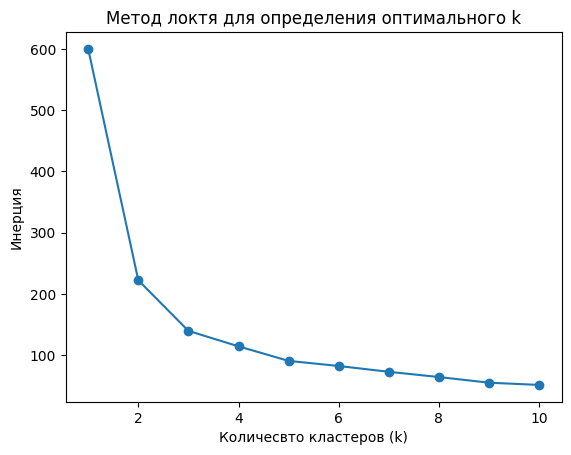

In [ ]:
inertias = []
k_range = range(1, 11) # проверяем k от 1 до 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=17)
    kmeans.fit(data_scaled)
    inertias.append(kmeans.inertia_)

# постоение графика
plt.plot(k_range, inertias, marker='o')
plt.title("Метод локтя для определения оптимального k")
plt.xlabel("Количесвто кластеров (k)")
plt.ylabel("Инерция")
plt.show()

### K-Means с случайной ининцализацией

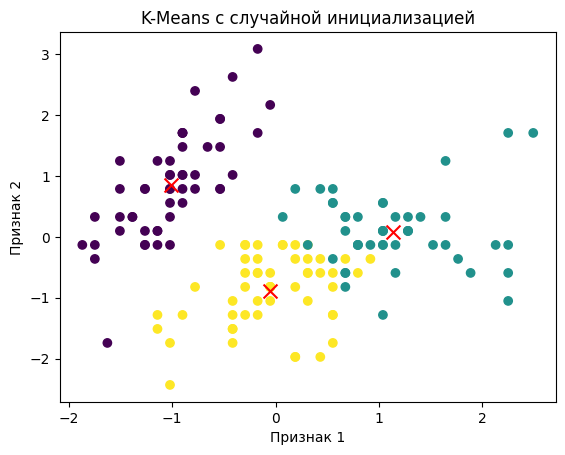

In [ ]:
kmeans_random = KMeans(n_clusters=3, init='random', random_state=17)
kmeans_random.fit(data_scaled)
clusters_random = kmeans_random.labels_
centroids_random = kmeans_random.cluster_centers_

# Визуализация
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters_random, cmap="viridis")
plt.scatter(centroids_random[:, 0], centroids_random[:, 1], c='red', s=100, marker='x')
plt.title('K-Means с случайной инициализацией')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.show()

### K-Means++

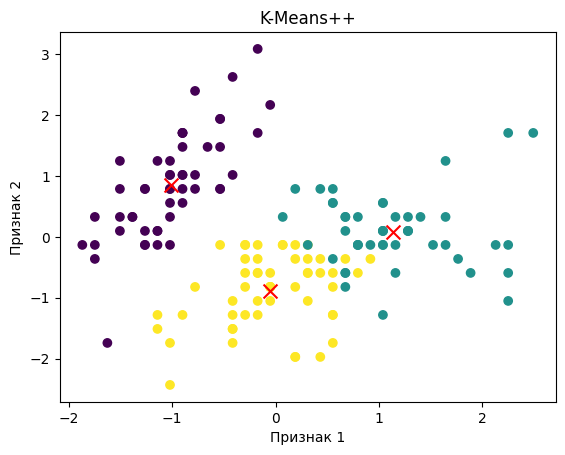

In [ ]:
kmeans_pp = KMeans(n_clusters=3, init='k-means++', random_state=17)
kmeans_pp.fit(data_scaled)
clusters_pp = kmeans_pp.labels_
centroids_pp = kmeans_pp.cluster_centers_

# Визуализация
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters_pp, cmap='viridis')
plt.scatter(centroids_pp[:, 0], centroids_pp[:, 1], c='red', s=100, marker='x')
plt.title("K-Means++")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.show()

## Сравнение результатов

In [ ]:
print("Инерция для K-Means с случайной инициализацией:", kmeans_random.inertia_)
print("Инерция для K-Means++:", kmeans_pp.inertia_)

Инерция для K-Means с случайной инициализацией: 139.82049635974982
Инерция для K-Means++: 139.82049635974982
